### Use K-Nearest Neighbours to predict the survival rate, accuracy is 65%

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
from sklearn import preprocessing

In [59]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,9,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,9,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,9,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,9,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,9,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df_test["Survived"] = 9

In [64]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [65]:
df_test = df_test[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [67]:
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,9,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,9,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,9,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,9,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [68]:
df_all.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [69]:
df_all.drop(["Cabin"], axis=1, inplace = True)

In [75]:
df_all.loc[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [76]:
df_all['Embarked'].fillna(df_all['Embarked'].mode()[0], inplace = True)

In [78]:
df_all.loc[df_all["PassengerId"].isin([62,830])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


In [79]:
df_all.loc[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,9,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [80]:
df_all['Fare'].fillna(df_all['Fare'].median(), inplace = True)

In [81]:
df_all['Age'].fillna(df_all['Age'].median(), inplace = True)

In [82]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,9,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,9,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,9,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,9,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [84]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [85]:
df_all['Sex_Code'] = label.fit_transform(df_all['Sex'])
df_all['Ticket_Code'] = label.fit_transform(df_all['Ticket'])
df_all['Embarked_Code'] = label.fit_transform(df_all['Embarked'])

In [86]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Ticket_Code,Embarked_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,720,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,816,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,914,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,65,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,649,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,9,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,1,711,2
1305,1306,9,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,834,0
1306,1307,9,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,872,2
1307,1308,9,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,1,579,2


In [87]:
df_all.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Sex_Code         0
Ticket_Code      0
Embarked_Code    0
dtype: int64

In [88]:
df_all.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Ticket_Code,Embarked_Code
count,1309.000000,1309.000000,1309.000000,1309,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,S,NaN,NaN,NaN
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,916,NaN,NaN,NaN
mean,655.000000,3.135218,2.294882,NaN,NaN,29.503186,0.498854,0.385027,NaN,33.281086,NaN,0.644003,463.625668,1.493506
std,378.020061,4.038525,0.837836,NaN,NaN,12.905241,1.041658,0.865560,NaN,51.741500,NaN,0.478997,278.069490,0.814244
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,0.000000,212.000000,1.000000
50%,655.000000,1.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,459.000000,2.000000
75%,982.000000,9.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,1.000000,727.000000,2.000000


In [90]:
val_columns = ['PassengerId', 'Survived', 'Pclass', 'Sex_Code', 'Age', 'Parch', 'Ticket_Code', 'Embarked_Code']

In [103]:
df_all['Survived'].unique()

array([0, 1, 9])

In [106]:
df_train_clean = df_all.loc[df_all['Survived'].isin([0,1])]
df_train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Ticket_Code,Embarked_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,720,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,816,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,914,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,65,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,649,2


In [107]:
df_test_clean = df_all.loc[df_all['Survived'].isin([9])]
df_test_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Ticket_Code,Embarked_Code
891,892,9,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,376,1
892,893,9,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,582,2
893,894,9,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,184,1
894,895,9,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,366,2
895,896,9,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,338,2


In [112]:
X = df_train_clean[['Pclass', 'Sex_Code', 'Age', 'SibSp', 'Parch', 'Ticket_Code', 'Fare', 'Embarked_Code']].values
y = df_train_clean[['Survived']].values

In [113]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
         0.93143334, -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         1.27816704,  0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
         1.63212435, -0.48885426,  0.58595414],
       [-1.56610693, -1.35557354,  0.4333115 ,  0.43279337, -0.47367361,
        -1.43430178,  0.42073024,  0.58595414],
       [ 0.82737724,  0.73769513,  0.4333115 , -0.4745452 , -0.47367361,
         0.67499487, -0.48633742,  0.58595414]])

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 8) (712, 1)
Test set: (179, 8) (179, 1)


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [118]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/bojiang/opt/anaconda3/lib/pyt

array([0.7877095 , 0.79329609, 0.82122905, 0.84916201, 0.82681564,
       0.83798883, 0.83798883, 0.83798883, 0.82681564])

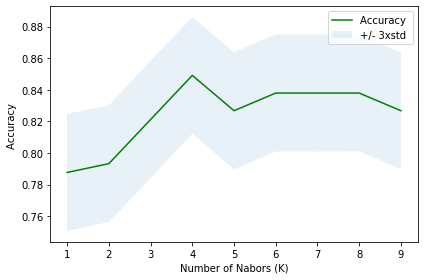

In [119]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [120]:
K = 4
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [121]:
X2 = df_test_clean[['Pclass', 'Sex_Code', 'Age', 'SibSp', 'Parch', 'Ticket_Code', 'Fare', 'Embarked_Code']].values
X2 = preprocessing.StandardScaler().fit(X).transform(X2.astype(float))

In [136]:
X2

array([[3.00000000e+00, 1.00000000e+00, 3.45000000e+01, ...,
        3.76000000e+02, 7.82920000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.15632656e-16, 4.70000000e+01, ...,
        5.82000000e+02, 7.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 6.20000000e+01, ...,
        1.84000000e+02, 9.68750000e+00, 1.00000000e+00],
       ...,
       [3.00000000e+00, 1.00000000e+00, 3.85000000e+01, ...,
        8.72000000e+02, 7.25000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 2.80000000e+01, ...,
        5.79000000e+02, 8.05000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 2.80000000e+01, ...,
        2.62000000e+02, 2.23583000e+01, 4.98416622e-17]])

In [137]:
X

array([[ 0.82737724,  0.73769513, -0.56573646, ...,  0.93143334,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103, ...,  1.27816704,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, ...,  1.63212435,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  1.66463064,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, ..., -1.62933949,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, ...,  0.64971221,
        -0.49237783, -0.67817453]])

In [122]:
yhat = neigh.predict(X2)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [123]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [125]:
df_test_clean['Survived'] = yhat

/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df_test_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Ticket_Code,Embarked_Code
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,376,1
892,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,582,2
893,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,184,1
894,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,366,2
895,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,338,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,1,711,2
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,834,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,872,2
1307,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,1,579,2


In [129]:
df_sub = df_test_clean[['PassengerId', 'Survived']]
df_sub

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [130]:
df_sub.to_csv('my_submission_01.csv', index=False)

In [131]:
# Use whole train
K = 4
neigh2 = KNeighborsClassifier(n_neighbors = 4).fit(X,y)

/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
df_test_clean['Survived'] = neigh2.predict(X2)

/Users/bojiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
df_sub2 = df_test_clean[['PassengerId', 'Survived']]
df_sub2

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [135]:
df_sub.to_csv('my_submission_02.csv', index=False)